In [2]:
import os 
import pandas as pd
import numpy as np

In [3]:
files = [i for i in os.listdir('datas') if not i.startswith('.')]

In [4]:
allData = pd.DataFrame()
for file in files:
    currentData = pd.read_csv(f'./datas/{file}')
    allData = pd.concat([allData, currentData])

In [5]:
allData = allData.dropna(how='all')
allData.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [5]:
allData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [6]:
allData['Price Each'] = pd.to_numeric(allData['Price Each'], errors = 'coerce')
allData['Quantity Ordered'] = pd.to_numeric(allData['Quantity Ordered'], errors = 'coerce')

In [7]:
allData.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


# Products with Its Profits

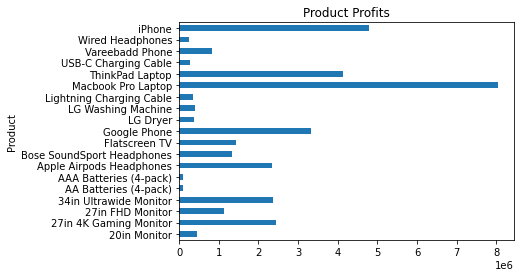

In [14]:
allData['Profit'] = allData['Price Each'] * allData['Quantity Ordered']
productProfits = allData.groupby('Product')['Profit'].sum()
productProfits.plot.barh(title = 'Product Profits');

# Quantity Demanded per Month

In [9]:
allData['Months'] = allData['Order Date'].str[:2]

In [10]:
allData = allData[allData['Order Date'].str[:2]!='Or']

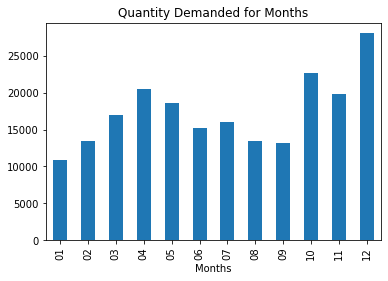

In [93]:
ordersPerMonth = allData.groupby('Months')['Quantity Ordered'].sum()
ordersPerMonth.plot.bar(title='Quantity Demanded for Months');

# Most Ordered Products

In [148]:
mostOrdProducts = allData.groupby('Product')['Quantity Ordered'].sum()

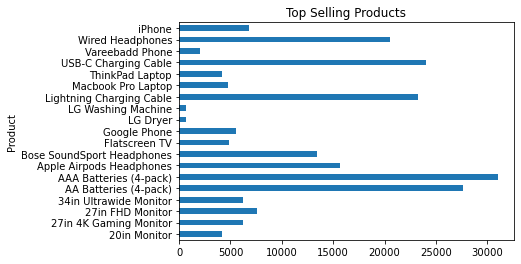

In [149]:
mostOrdProducts.plot.barh(title = 'Top Selling Products');

# Quantity Ordered From Cities

In [69]:
allData['City'] = allData['Purchase Address'].str.split(',', n=2, expand=True)[1]
allData.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Profit,Months,City
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,04,Dallas
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,04,Boston
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,04,Los Angeles
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,04,Los Angeles
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,04,Los Angeles


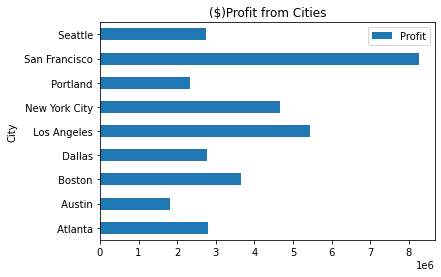

In [96]:
allData.groupby('City').sum().plot.barh(y='Profit', title='($)Profit from Cities');

# Most Active Hours

In [122]:
allDataDate = allData['Order Date'].str.split(' ', n=2, expand = True)[1]
allDataHours = allDataDate.str.split(':', expand = True)[0]
allData['Hour'] = allDataHours

In [123]:
allData.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Profit,Months,City,Hour
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,04,Dallas,08
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,04,Boston,22
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,04,Los Angeles,14
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,04,Los Angeles,14
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,04,Los Angeles,09


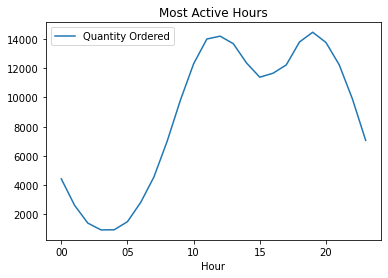

In [142]:
allData.groupby('Hour')[['Quantity Ordered']].sum().plot.line(title = 'Most Active Hours');

# Products That Are Taken Together Commonly

In [183]:
df = allData[allData['Order ID'].duplicated(keep=False)]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Profit,Months,City,Hour
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,04,Los Angeles,14
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,04,Los Angeles,14
18,176574,Google Phone,1.0,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",600.00,04,Los Angeles,19
19,176574,USB-C Charging Cable,1.0,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",11.95,04,Los Angeles,19
30,176585,Bose SoundSport Headphones,1.0,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",99.99,04,Boston,11


In [188]:
df['bougtTogether'] = df.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))

<ipython-input-188-7d995fc6b591>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bougtTogether'] = df.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))


In [196]:
groupedProducts = df[['Order ID', 'bougtTogether']].drop_duplicates()

In [209]:
from itertools import combinations
from collections import Counter
count = Counter()

for row in groupedProducts['bougtTogether']:
    order = row.split(', ')
    count.update(Counter(combinations(order, 2)))
    
productsList = []
values = []

for products, value in count.most_common(20):
    print(products, value)
    productsList.append(products)
    values.append(value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92
('Lightning Charging Cable', 'Apple Airpods Headphones') 81
('Vareebadd Phone', 'Bose SoundSport Headphones') 80
('USB-C Charging Cable', 'Bose SoundSport Headphones') 77
('Apple Airpods Headphones', 'Wired Headphones') 69
('Lightning Charging Cable', 'USB-C Charging Cable') 58
('Lightning Charging Cable', 'AA Batteries (4-pack)') 55
('Lightning Charging Cable', 'Lightning Charging Cable') 54
('Bose SoundSport Headphones', 'Wired Headphones') 53
('AA Batteries (4-pack)', 'Lightning Charging Cable') 51
('AAA Batteries (4-pack)', 'USB-C Chargin

In [240]:
groupedProducts = {'Products': productsList, 'OrderedTogether': values}
groupedProducts = pd.DataFrame(groupedProducts)

In [261]:
groupedProducts['Products'] = groupedProducts['Products'].astype(str)

In [301]:
import re

In [322]:
groupedProducts['Products'] = groupedProducts['Products'].apply(lambda x: re.sub('[()]','', x))
groupedProducts['Products'] = groupedProducts['Products'].str.replace("'",'')

In [325]:
groupedProducts

,Products,OrderedTogether
0,"iPhone, Lightning Charging Cable",1005
1,"Google Phone, USB-C Charging Cable",987
2,"iPhone, Wired Headphones",447
3,"Google Phone, Wired Headphones",414
4,"Vareebadd Phone, USB-C Charging Cable",361
5,"iPhone, Apple Airpods Headphones",360
6,"Google Phone, Bose SoundSport Headphones",220
7,"USB-C Charging Cable, Wired Headphones",160
8,"Vareebadd Phone, Wired Headphones",143
9,"Lightning Charging Cable, Wired Headphones",92
